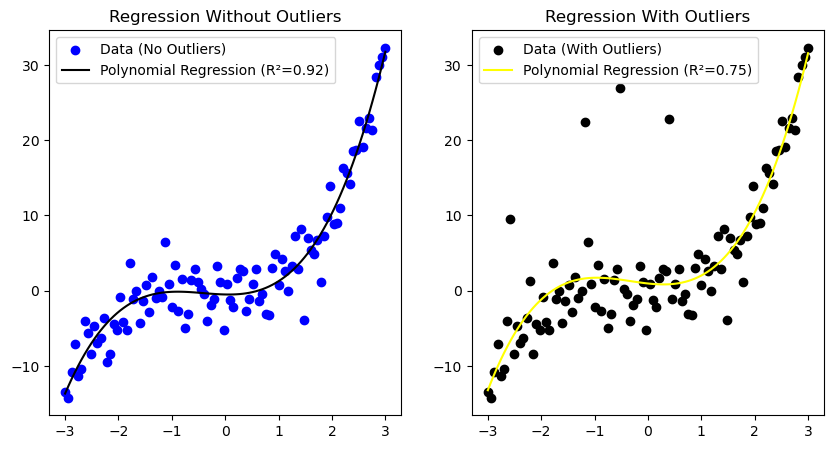

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = X**3 + X**2 - X + np.random.normal(0, 3, size=(100, 1))  

outlier_indices = np.random.choice(100, 5, replace=False) 
y_with_outliers = y.copy()
y_with_outliers[outlier_indices] += np.random.normal(20, 5, size=(5, 1))  

poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)

poly_reg_clean = LinearRegression()
poly_reg_clean.fit(X_poly, y)
y_poly_pred_clean = poly_reg_clean.predict(X_poly)
r2_clean = r2_score(y, y_poly_pred_clean)

poly_reg_outliers = LinearRegression()
poly_reg_outliers.fit(X_poly, y_with_outliers)
y_poly_pred_outliers = poly_reg_outliers.predict(X_poly)
r2_outliers = r2_score(y_with_outliers, y_poly_pred_outliers)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', label="Data (No Outliers)")
plt.plot(X, y_poly_pred_clean, color='BLACK', label=f"Polynomial Regression (R²={r2_clean:.2f})")
plt.legend()
plt.title("Regression Without Outliers")

plt.subplot(1, 2, 2)
plt.scatter(X, y_with_outliers, color='Black', label="Data (With Outliers)")
plt.plot(X, y_poly_pred_outliers, color='yellow', label=f"Polynomial Regression (R²={r2_outliers:.2f})")
plt.legend()
plt.title("Regression With Outliers")
plt.show()